In [86]:
from typing import Tuple, Any, List
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [43]:
TOTAL: int = 256
LENGTH: int = 64
SAMPLE_FREQ = 32
SAMPLE_OFFSET = 0

In [44]:
COLORS = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

In [45]:
def create_test_array(length):
    arr = []
    indices = []
    initial = random.randint(0,1)
    if initial == 1:
        indices.append(0)
    index = 0
    while len(arr) < length:
        step = random.randint(2,int(length/5))
        if len(arr) + step > length - 1:
            step = length - len(arr)
        else:
            index += step
            if initial == 1:
                indices.append(index - 1)
            else:
                indices.append(index)
        for _ in range(step):
            arr.append(initial)
        initial = 1 if initial == 0 else 0
    if initial == 0:
        # NOTE: initial has switched back, the last appended value was 1
        indices.append(length - 1)
    return np.array(arr[:length]), np.array(indices)

array([  0,  41,  63, 109, 149, 159, 171, 179, 229, 236])

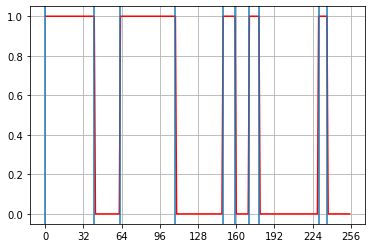

In [52]:
arr, indices = create_test_array(TOTAL)

plt.plot(np.arange(0, TOTAL), arr, color='red')
ax = plt.gca()
ax.set_xticks(np.arange(0, TOTAL+1, SAMPLE_FREQ))
for i in indices:
    plt.axvline(i)
plt.grid(True)
indices

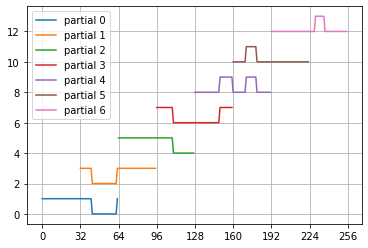

In [53]:
# create partial time-series
partials = [arr[i*SAMPLE_FREQ:i*SAMPLE_FREQ+LENGTH] for i in range(0, int((TOTAL - LENGTH)/SAMPLE_FREQ) + 1)]

ax = plt.gca()
for i, p in enumerate(partials):
    index = np.arange(i*SAMPLE_FREQ,i*SAMPLE_FREQ+LENGTH)
    ax.plot(index, p.copy() + 2 * i, label=f'partial {i}')
ax.set_xticks(np.arange(0, TOTAL+1, SAMPLE_FREQ))
plt.legend()
plt.grid(True)

In [54]:
# choose the two quarters at the middle of the ts
CENTER = int(LENGTH / 2)
CENTER_OFFSET = int(LENGTH / 4)

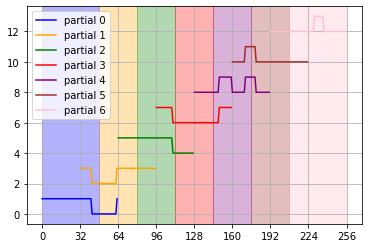

In [55]:
ax = plt.gca()
for i, p in enumerate(partials):
    index = np.arange(i*SAMPLE_FREQ, i*SAMPLE_FREQ+LENGTH)
    ax.plot(index, p.copy() + 2 * i, label=f'partial {i}', color=COLORS[i])
    
    start = i * SAMPLE_FREQ + CENTER_OFFSET
    if i == 0:
        start -= CENTER_OFFSET
    
    end = i * SAMPLE_FREQ + CENTER_OFFSET + CENTER
    if i == len(partials) - 1:
        end += CENTER_OFFSET
    ax.axvspan(start, end, alpha=0.3, color=COLORS[i])
    
ax.set_xticks(np.arange(0, TOTAL+1, SAMPLE_FREQ))
plt.legend()
plt.grid(True)

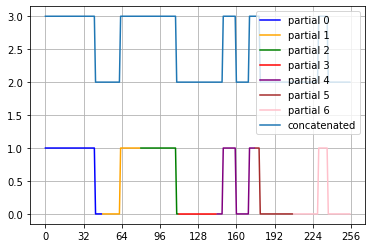

In [59]:
ax = plt.gca()
concatenated = np.array([])
for i, p in enumerate(partials):
    
    abs_start = int(i * SAMPLE_FREQ + CENTER_OFFSET) if (i != 0 ) else i * SAMPLE_FREQ
    rel_start = CENTER_OFFSET if (i != 0) else 0
    
    abs_end = int(i * SAMPLE_FREQ + CENTER_OFFSET + CENTER) if (i != len(partials) - 1) else int(i * SAMPLE_FREQ + CENTER + 2 * CENTER_OFFSET)
    rel_end = CENTER_OFFSET + CENTER if (i != len(partials) - 1) else CENTER + 2 * CENTER_OFFSET
    
    index = np.arange(abs_start, abs_end)
    ax.plot(index, p[rel_start:rel_end], label=f'partial {i}', color=COLORS[i])
    concatenated = np.concatenate((concatenated, p[rel_start:rel_end]), axis=0)
    # ax.axvspan(abs_start, abs_end, alpha=0.3, color=COLORS[i])

ax.plot(np.arange(0, TOTAL), concatenated.copy() + 2, label=f'concatenated')
ax.set_xticks(np.arange(0, TOTAL+1, SAMPLE_FREQ))
plt.legend()
plt.grid(True)

In [61]:
# result
def concat_partials(partials: List[np.array]) -> np.array:
    concatenated = np.array([])
    for i, p in enumerate(partials):
        abs_start = int(i * SAMPLE_FREQ + CENTER_OFFSET) if (i != 0 ) else i * SAMPLE_FREQ
        rel_start = CENTER_OFFSET if (i != 0) else 0
    
        abs_end = int(i * SAMPLE_FREQ + CENTER_OFFSET + CENTER) if (i != len(partials) - 1) else int(i * SAMPLE_FREQ + CENTER + 2 * CENTER_OFFSET)
        rel_end = CENTER_OFFSET + CENTER if (i != len(partials) - 1) else CENTER + 2 * CENTER_OFFSET
    
        concatenated = np.concatenate((concatenated, p[rel_start:rel_end]), axis=0)
    return concatenated

In [82]:
TOTAL: int = 300
LENGTH: int = 320
SAMPLE_FREQ = 32
SAMPLE_OFFSET = 0

In [83]:
arr[192:192+LENGTH]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
def pad_ts(arr: np.array, fill: int = 0):
    if len(arr) % LENGTH != 0:
        padded = np.concatenate([arr, np.zeros(LENGTH - len(arr) % LENGTH)])
        return padded
    return arr

In [85]:
new_arr, new_indices = create_test_array(300)
pad_ts(new_arr).shape

(320,)

In [91]:
df = pd.DataFrame({
    'A' : [0, 1, 2, 3],
    'B' : ['a', 'b', 'c', 'd']
})
df[4:6] = 0
df

,A,B
0,0,a
1,1,b
2,2,c
3,3,d
